# Proyek 3 :  Prediksi Harga Mata Uang Kripto Cardano (ADA) dengan Multivariate dan Random Forest Regressor

## Pendahuluan

### Latar Belakang

Broker atau bisa disebut juga perantara dalam transaksi keuangan untuk membantu klien dalam proses menjual dan membeli aset seperti saham, obligasi, komoditas, mata uang, dan instrumen keuangan lainnya. Kasus ini terdapat sebuah perusahaan broker yang bernama PT Investasi Jaya merupakan broker-dealer yang memiliki peran ganda dalam pasar saham :
- Sebagai **broker**, perusahaan ini bertindak sebagai perantara antara pembantu antara klien untuk melakukan jual beli saham dan mendapat komisi atas kegiatan tersebut.
- Sebagai **dealer**, perusahaan melakukan pembelian saham dalam jumlah besar dan menjual saham pada harga yang melebihi harga beli untuk kepentingan perusahaan sendiri.

Sebagai dealer, perusahaan memerlukan analisis harga saham yang sangat akurat untuk bisa melakukan prediksi dengan menganalisa pola harga saham pada waktu lampau untuk bisa membuat analisis prediksi terkait kenaikan dan penurunan harga saham. Sehingga, jika perusahaan mampu memprediksi harga saham, perusahaan mampu untuk membuat keputusan untuk membeli ataupun menjual saham dalam jumlah banyak untuk mencapai keuntungan sebesar-besarnya. Tantangan yang dihadapi perusahaan ini adalah belum ada alat yang bisa melakukan prediksi harga saham yang cukup akurat dan perusahaan melakukan analisis harga saham secara manual yang cukup merepotkan dan memakan waktu lama.

### Tujuan

Proposal ini bertujuan untuk mengimplementasikan proyek sains data yang fokus pada : 
1. Membangun model machine learning yang efektif untuk memprediksi kenaikan harga saham.
2. Menganalisa pola kenaikan dan penerunan harga saham untuk mengevaluasi teknik pembelian dan penjualan saham oleh perusahaan.

### Rumusan Masalah

1. Bagaimana menganalisa pola kenaikan dan penurunan harga saham?
2. Bagaimana membangun model machine learning untuk memprediksi kenaikan dan penurunan harga saham dengan akurat?


## Import Library

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error


## EDA (Exsploratory Data Analysis)

### Load Data

Data didapatkan dari situs web https://www.investing.com dengan interval harian dari tahun 2020 sampai 2024.

In [2]:
df = pd.read_csv('./dataset/HistoricalCardano.csv')
df = df.reindex(index=df.index[::-1])
df = df.reset_index(drop=True)

In [3]:
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,01/01/2020,"0,0335","0,0328","0,0338","0,0327","250,86M","1,94%"
1,02/01/2020,"0,0327","0,0335","0,0335","0,0323","216,63M","-2,33%"
2,03/01/2020,"0,0341","0,0327","0,0344","0,0324","341,59M","4,32%"
3,04/01/2020,"0,0344","0,0341","0,0345","0,0337","358,20M","0,79%"
4,05/01/2020,"0,0346","0,0344","0,0353","0,0342","216,71M","0,73%"
...,...,...,...,...,...,...,...
1730,26/09/2024,"0,4016","0,3811","0,4037","0,3782","165,03M","5,38%"
1731,27/09/2024,"0,4017","0,4016","0,4153","0,3999","148,17M","0,00%"
1732,28/09/2024,"0,4006","0,4017","0,4058","0,3924","102,69M","-0,27%"
1733,29/09/2024,"0,3976","0,4006","0,4041","0,3927","89,35M","-0,74%"


### Informasi Data

Dari informasi yang didapat, data memiliki fitur atau kolom sebanyak 5 (jika dimulai dari 1) dan baris sebanyak 1735 (jika dimulai dari 1). dan memiliki nilai missing values sebanyak 5 pada fitur *Vol.*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     1735 non-null   object
 1   Terakhir    1735 non-null   object
 2   Pembukaan   1735 non-null   object
 3   Tertinggi   1735 non-null   object
 4   Terendah    1735 non-null   object
 5   Vol.        1730 non-null   object
 6   Perubahan%  1735 non-null   object
dtypes: object(7)
memory usage: 95.0+ KB


### Tranformasi Data

tranformasi data diperlukan untuk mengubah tipe data dalam dataframe karena sebelumnya semua fitur memiliki tipe data objek dan dalam proses ini diubah menyesuaikan tipe data yang sebenarnya.

In [5]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)
df['Perubahan%'] = df['Perubahan%'].str.replace('%', '').str.replace(',', '.').astype(float)
df['Perubahan%'] = df['Perubahan%'].astype(float)
df['Vol.'] = df['Vol.'].str.replace('M', 'e6').str.replace('B', 'e9').str.replace(',', '.').astype(float)
df['Terakhir'] = df['Terakhir'].str.replace(',', '.').astype(float)
df['Pembukaan'] = df['Pembukaan'].str.replace(',', '.').astype(float)
df['Tertinggi'] = df['Tertinggi'].str.replace(',', '.').astype(float)
df['Terendah'] = df['Terendah'].str.replace(',', '.').astype(float)

df = df.set_index('Tanggal')

In [6]:
df

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
Tanggal,,,,,,
2020-01-01,0.0335,0.0328,0.0338,0.0327,250860000.0,1.94
2020-01-02,0.0327,0.0335,0.0335,0.0323,216630000.0,-2.33
2020-01-03,0.0341,0.0327,0.0344,0.0324,341590000.0,4.32
2020-01-04,0.0344,0.0341,0.0345,0.0337,358200000.0,0.79
2020-01-05,0.0346,0.0344,0.0353,0.0342,216710000.0,0.73
...,...,...,...,...,...,...
2024-09-26,0.4016,0.3811,0.4037,0.3782,165030000.0,5.38
2024-09-27,0.4017,0.4016,0.4153,0.3999,148170000.0,0.00
2024-09-28,0.4006,0.4017,0.4058,0.3924,102690000.0,-0.27


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1735 entries, 2020-01-01 to 2024-09-30
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Terakhir    1735 non-null   float64
 1   Pembukaan   1735 non-null   float64
 2   Tertinggi   1735 non-null   float64
 3   Terendah    1735 non-null   float64
 4   Vol.        1730 non-null   float64
 5   Perubahan%  1735 non-null   float64
dtypes: float64(6)
memory usage: 94.9 KB


### Missing Values

Dalam dataset ini memiliki 5 missing values pada fitur *Vol.*

In [8]:
df.isnull().sum()

Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          5
Perubahan%    0
dtype: int64

### Distribusi Data

#### Histogram

array([[<Axes: title={'center': 'Terakhir'}>,
        <Axes: title={'center': 'Pembukaan'}>],
       [<Axes: title={'center': 'Tertinggi'}>,
        <Axes: title={'center': 'Terendah'}>],
       [<Axes: title={'center': 'Vol.'}>,
        <Axes: title={'center': 'Perubahan%'}>]], dtype=object)

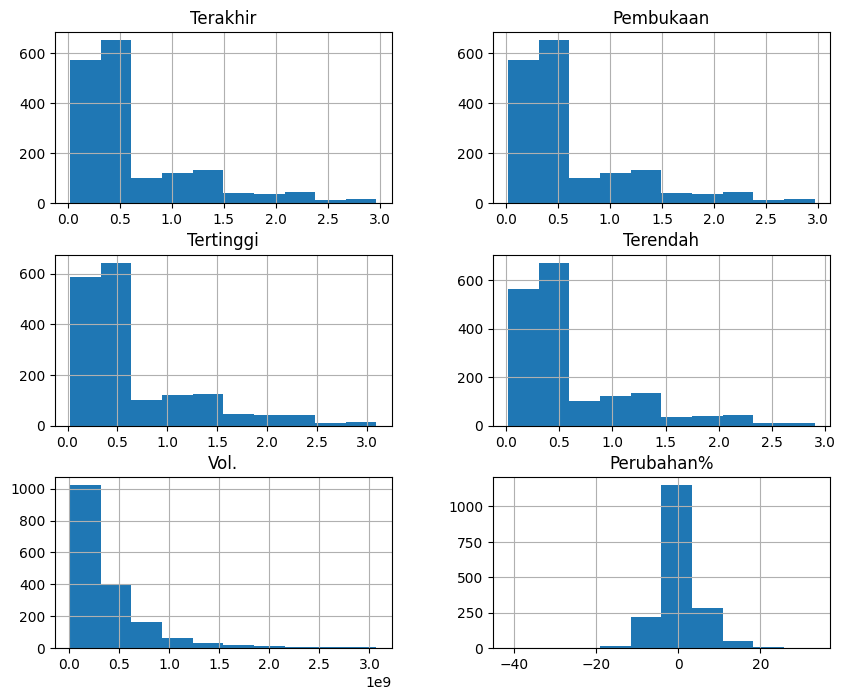

In [9]:
df.hist(figsize=(10, 8))

#### Box Plot

<Axes: >

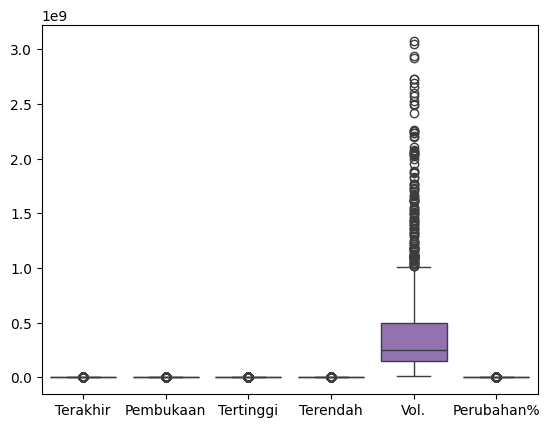

In [10]:
sns.boxplot(data=df)

#### Scatter Plot

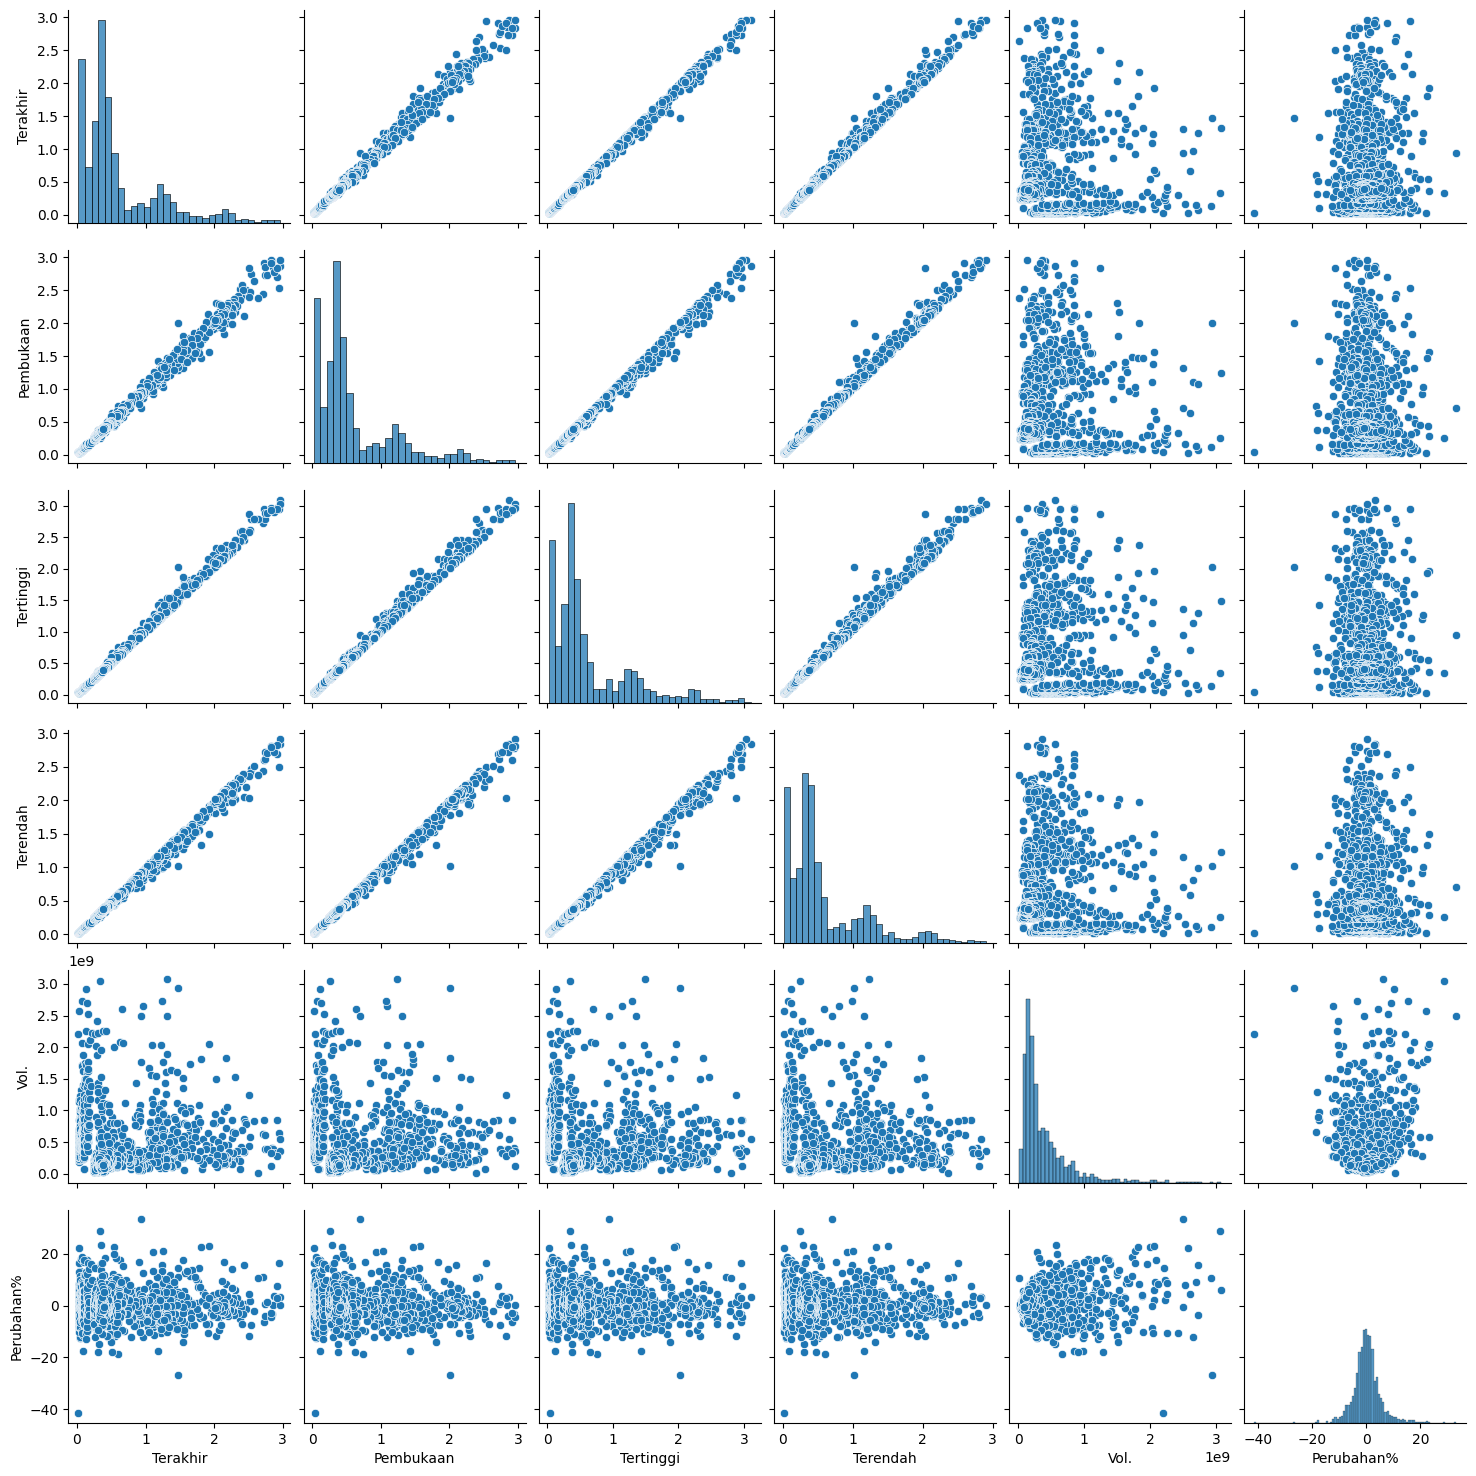

In [11]:
sns.pairplot(df)

### Korelasi Antar Fitur

            Terakhir  Pembukaan  Tertinggi  Terendah      Vol.  Perubahan%
Terakhir    1.000000   0.996477   0.998657  0.997674  0.046679    0.012080
Pembukaan   0.996477   1.000000   0.998114  0.996847  0.041774   -0.048996
Tertinggi   0.998657   0.998114   1.000000  0.996172  0.062240   -0.012594
Terendah    0.997674   0.996847   0.996172  1.000000  0.016960   -0.015539
Vol.        0.046679   0.041774   0.062240  0.016960  1.000000    0.156626
Perubahan%  0.012080  -0.048996  -0.012594 -0.015539  0.156626    1.000000


<Axes: >

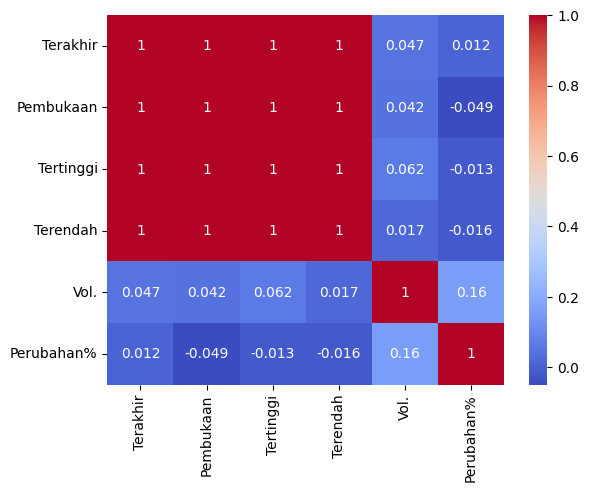

In [12]:
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

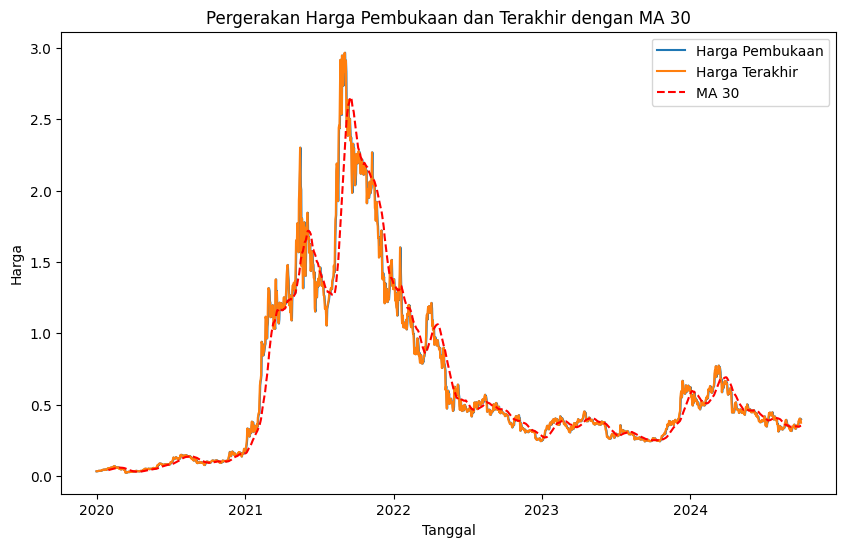

In [13]:
# Calculate 30-day moving average
df['MA30'] = df['Terakhir'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Pembukaan'], label='Harga Pembukaan')
plt.plot(df['Terakhir'], label='Harga Terakhir')
plt.plot(df['MA30'], label='MA 30', linestyle='--', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Pergerakan Harga Pembukaan dan Terakhir dengan MA 30')
plt.legend()
plt.show()

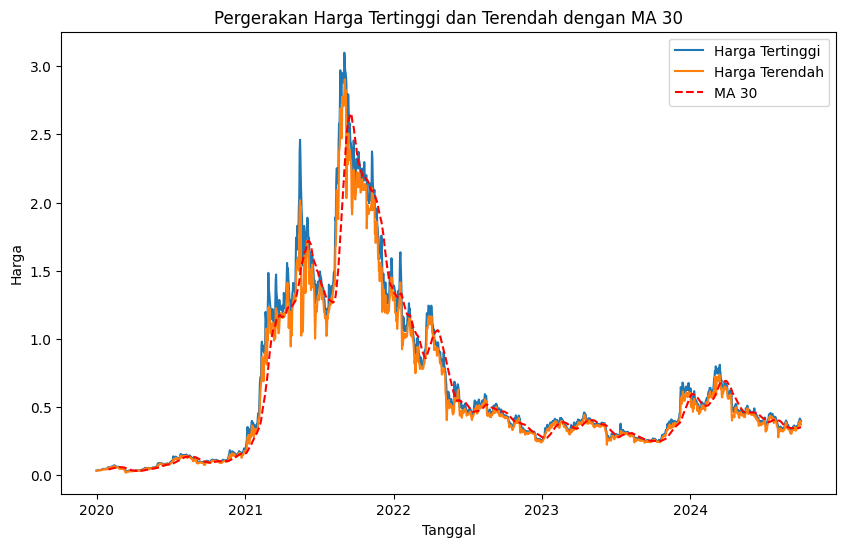

In [14]:
# Calculate 30-day moving average
df['MA30'] = df['Terakhir'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Tertinggi'], label='Harga Tertinggi')
plt.plot(df['Terendah'], label='Harga Terendah')
plt.plot(df['MA30'], label='MA 30', linestyle='--', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Pergerakan Harga Tertinggi dan Terendah dengan MA 30')
plt.legend()
plt.show()

df = df.drop(columns=['MA30'])

## Data Pre-Processing

### Seleksi Fitur

In [15]:
selected_features = ['Vol.', 'Perubahan%']
df = df.drop(selected_features, axis=1)

df

,Terakhir,Pembukaan,Tertinggi,Terendah
Tanggal,,,,
2020-01-01,0.0335,0.0328,0.0338,0.0327
2020-01-02,0.0327,0.0335,0.0335,0.0323
2020-01-03,0.0341,0.0327,0.0344,0.0324
2020-01-04,0.0344,0.0341,0.0345,0.0337
2020-01-05,0.0346,0.0344,0.0353,0.0342
...,...,...,...,...
2024-09-26,0.4016,0.3811,0.4037,0.3782
2024-09-27,0.4017,0.4016,0.4153,0.3999
2024-09-28,0.4006,0.4017,0.4058,0.3924


### Normalisasi Min-Max

In [16]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

df_scaled

,Terakhir,Pembukaan,Tertinggi,Terendah
Tanggal,,,,
2020-01-01,0.003501,0.003263,0.002376,0.005164
2020-01-02,0.003229,0.003501,0.002278,0.005026
2020-01-03,0.003705,0.003229,0.002571,0.005060
2020-01-04,0.003807,0.003705,0.002604,0.005511
2020-01-05,0.003875,0.003807,0.002864,0.005684
...,...,...,...,...
2024-09-26,0.128620,0.121648,0.122770,0.124913
2024-09-27,0.128654,0.128616,0.126546,0.132434
2024-09-28,0.128280,0.128650,0.123454,0.129835


### Deteksi Outlier

#### Metode Local Outlier Factor (LOF)

In [17]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(df_scaled)
print(y_pred)
print(np.where(y_pred == -1))
print(clf.negative_outlier_factor_)

[ 1  1  1 ...  1  1 -1]
(array([  42,   43,   44,   45,   56,   71,   72,   75,   76,  148,  150,
        182,  188,  206,  237,  238,  239,  241,  246,  248,  268,  310,
        324,  326,  330,  357,  363,  364,  365,  366,  367,  368,  369,
        370,  371,  372,  373,  374,  375,  376,  377,  378,  380,  381,
        382,  385,  386,  387,  392,  393,  397,  398,  401,  402,  406,
        411,  416,  418,  419,  420,  422,  423,  428,  433,  440,  441,
        442,  450,  473,  475,  477,  478,  481,  490,  498,  500,  501,
        502,  504,  505,  506,  508,  509,  515,  537,  538,  539,  590,
        596,  598,  615,  616,  628,  630,  679,  703,  751,  752,  812,
        854,  859,  860,  861,  862,  863,  865,  868,  880,  881,  882,
        893,  894,  895,  896,  897,  899,  900,  929,  931,  961,  968,
        991, 1016, 1028, 1038, 1042, 1043, 1044, 1080, 1083, 1103, 1104,
       1125, 1135, 1140, 1141, 1142, 1166, 1175, 1185, 1253, 1255, 1256,
       1274, 1289, 1290, 1

#### Metode Box Plot (Interquartile)

<Axes: >

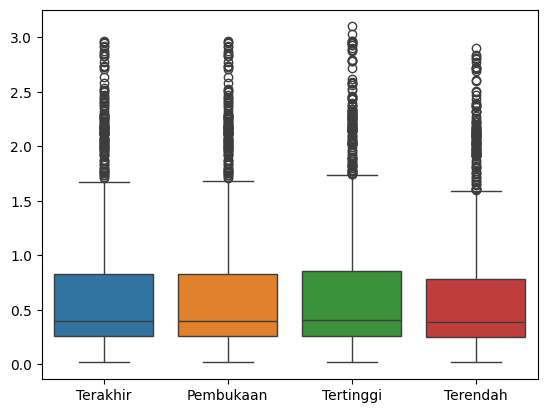

In [18]:
sns.boxplot(data=df)

#### Membuat Lag Fitur

In [19]:
def create_lagged_features(data, lags=3):
    lagged_data = data.copy()
    for lag in range(1, lags + 1):
        lagged_data[[f"{col}_lag{lag}" for col in data.columns]] = data.shift(lag)
    lagged_data.dropna(inplace=True)
    return lagged_data

In [39]:
lags = 30 * 24
data = create_lagged_features(df, lags)

data.to_csv('./lagged_data.csv')

/tmp/ipykernel_285199/4182035875.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lagged_data[[f"{col}_lag{lag}" for col in data.columns]] = data.shift(lag)
/tmp/ipykernel_285199/4182035875.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lagged_data[[f"{col}_lag{lag}" for col in data.columns]] = data.shift(lag)
/tmp/ipykernel_285199/4182035875.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

#### Splitting Data

In [21]:
X = data.drop(columns=['Pembukaan', 'Terakhir', 'Tertinggi', 'Terendah'])
y = data["Pembukaan"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Modelling

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [24]:
y_pred = model.predict(X_test)
print(y_pred)

[0.747953 0.738962 0.74337  0.745919 0.730875 0.699949 0.679588 0.693612
 0.596447 0.663993 0.655404 0.635758 0.648618 0.662339 0.674587 0.693519
 0.663689 0.667745 0.676165 0.679828 0.683135 0.645727 0.584525 0.573429
 0.582336 0.578693 0.583977 0.59618  0.629714 0.597044 0.590744 0.590298
 0.505059 0.446934 0.469453 0.466809 0.460379 0.445395 0.459862 0.46987
 0.5088   0.503049 0.517862 0.501756 0.478407 0.472624 0.466895 0.469995
 0.461066 0.459876 0.443985 0.45336  0.459882 0.469184 0.467007 0.456919
 0.454639 0.440862 0.451759 0.464439 0.448121 0.442319 0.438448 0.436305
 0.429067 0.451982 0.457524 0.482604 0.482622 0.466569 0.501834 0.493534
 0.484667 0.466561 0.458203 0.464123 0.457019 0.468571 0.456945 0.451156
 0.446774 0.447599 0.450045 0.446797 0.456887 0.463784 0.463828 0.456865
 0.449434 0.43623  0.442587 0.440407 0.420853 0.437939 0.420034 0.41209
 0.415162 0.415873 0.403159 0.383006 0.383798 0.383683 0.375925 0.383957
 0.380669 0.381718 0.396127 0.388629 0.395383 0.38955

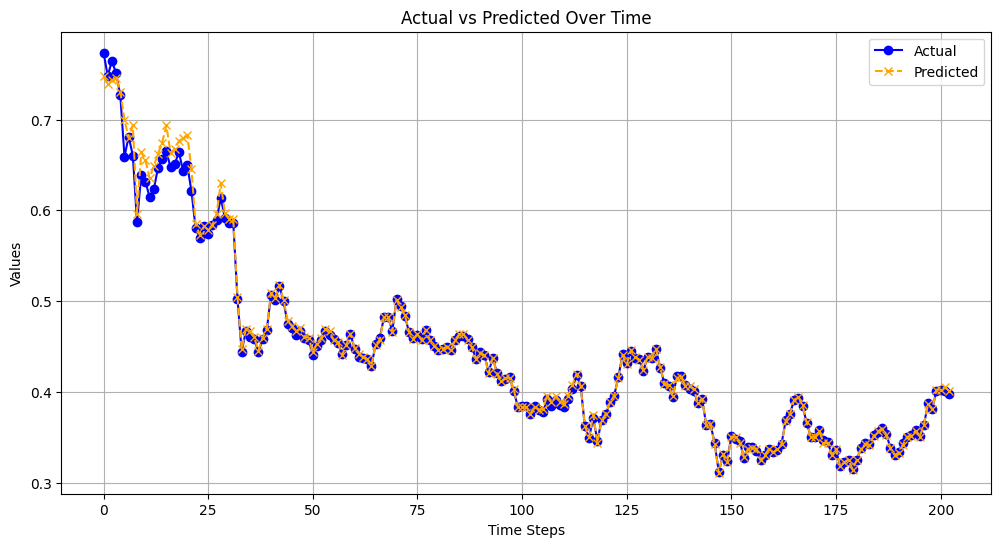

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker="o", linestyle="-", color="blue")
plt.plot(model.predict(X_test), label="Predicted", marker="x", linestyle="--", color="orange")
plt.title("Actual vs Predicted Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

In [26]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 6.07754227733993e-05
Mean Absolute Error (MAE): 0.003493630541871933
Mean Absolute Percentage Error (MAPE): 0.00631859338085924
R-squared (R²): 0.9940480441700581


#### Prediksi

In [29]:
def multistep_forecast(model, data, n_steps):
  forecast = []
  last_observation = data.iloc[-1].values.reshape(1, -1)
  
  for _ in range(n_steps):
    next_step = model.predict(last_observation)
    forecast.append(next_step[0])
    
    # Update the last observation with the new prediction
    last_observation = np.roll(last_observation, -1)
    last_observation[0, -1] = next_step[0]
  
  return forecast

# Number of steps to forecast
n_steps = 30 * 12

# Perform the forecast
forecasted_values = multistep_forecast(model, X, n_steps)
print(forecasted_values)

/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/

[0.40139400000000003, 0.40513499999999975, 0.40849299999999994, 0.3959179999999998, 0.4050889999999998, 0.40602899999999986, 0.409478, 0.39236799999999983, 0.40253599999999984, 0.4060509999999999, 0.41532900000000017, 0.3997899999999997, 0.40253299999999986, 0.3848709999999999, 0.40508199999999994, 0.3784180000000001, 0.3812949999999999, 0.3871420000000002, 0.3940159999999998, 0.3786769999999999, 0.38716600000000023, 0.3640600000000001, 0.39207000000000003, 0.35764399999999996, 0.36391700000000016, 0.3508319999999998, 0.36564900000000017, 0.3439839999999998, 0.3509899999999998, 0.3574809999999999, 0.35876999999999987, 0.34257199999999977, 0.35742999999999986, 0.3511939999999998, 0.3592849999999999, 0.3504139999999997, 0.35118699999999975, 0.3508149999999997, 0.3614750000000001, 0.3497109999999997, 0.3508309999999997, 0.34209599999999973, 0.3565669999999998, 0.3420869999999997, 0.34203599999999973, 0.3328820000000001, 0.3420559999999997, 0.328207, 0.3329300000000001, 0.3309120000000001,

/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/wchynto/.local/lib/python3.9/

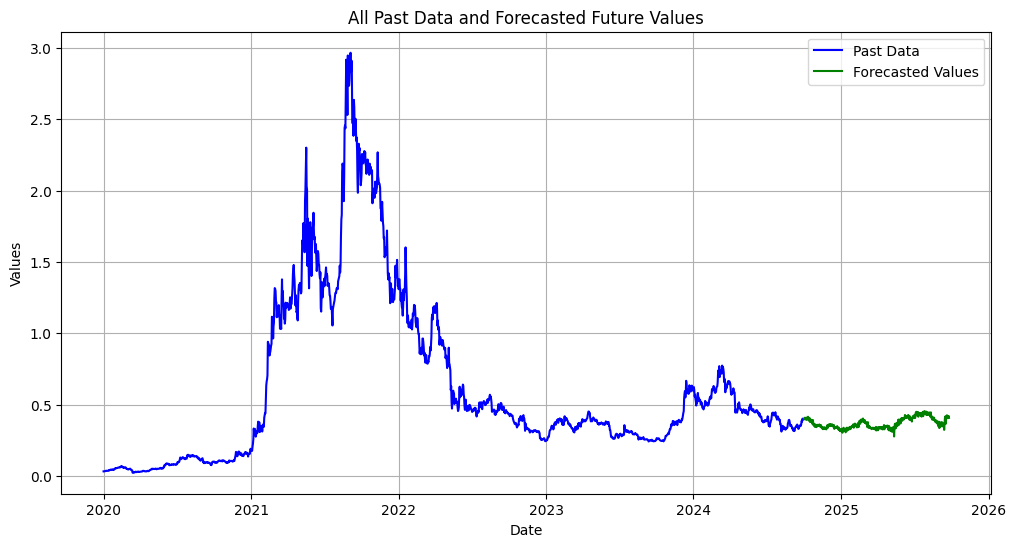

In [ ]:
# Combine past and forecasted values
combined_values = np.concatenate([y_test.values, forecasted_values])

# Create a time index for the combined values
time_index = pd.date_range(start=y_test.index[0], periods=len(combined_values), freq='D')

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Pembukaan'], label="Past Data", linestyle="-", color="blue")
plt.plot(time_index[len(y_test):], forecasted_values, label="Forecasted Values", linestyle="-", color="green")
plt.title("All Past Data and Forecasted Future Values")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()